In [1]:
%cd ../code

/home/chickencurry/markup-ocr/experiments/seq2seq/encoder-decoder/code


In [2]:
from data import LatexEquationDataset, load_tokenizer, load_img_names_to_skip, curry_collate_fn, clean
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

/home/chickencurry/miniconda3/envs/directml/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
img_test_dir = "../data/formulae/test"
img_train_dir = "../data/formulae/train"
img_val_dir = "../data/formulae/val"
equations_path = "../data/formulae/math.txt"
tokenizer_path = "../data/test_tokenizer.json"
img_names_to_skip_dir = "../data/img_names_to_skip"

In [4]:
tokenizer = load_tokenizer(tokenizer_path)
img_names_to_skip = load_img_names_to_skip(img_names_to_skip_dir)

/home/chickencurry/miniconda3/envs/directml/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
dataset = LatexEquationDataset(equations_path, img_train_dir, img_names_to_skip, tokenizer)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)#  collate_fn=curry_collate_fn(tokenizer.convert_tokens_to_ids("[PAD]")))

\theta _ { 1 } + \theta _ { 2 } = \theta _ { 3 } + \theta _ { 4 } = 9 0 ^ { \circ } .


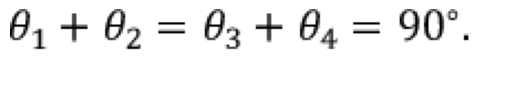

In [6]:
item = next(iter(dataloader))
tokens = tokenizer.convert_ids_to_tokens(item[1][0].tolist(), skip_special_tokens = True)
print(clean("".join(tokens)))

plt.figure()
plt.axis("off")
plt.imshow(item[0][0].squeeze(0), cmap="gray")
plt.show()

In [7]:
# shape (h, w, l)
# shapes = [(item[0][0].shape[1], item[0][0].shape[2], item[1][0].shape[0])  for item in dataloader]
# print(shapes[0:10])
# test =  shapes[0:100]
# print(test)
# test = sorted(test, key = lambda x: x, reverse=True)
# print(test)

In [25]:
sorting = lambda i: (
                dataset[i][0].shape[1],
                dataset[i][0].shape[2],
                dataset[i][1].shape[0],
            )

indices = sorted(
    list(range(len(dataset))),  # type: ignore
    key=sorting,
    reverse=True,
    )

print([dataset[i][1].shape for i in indices])

KeyboardInterrupt: 

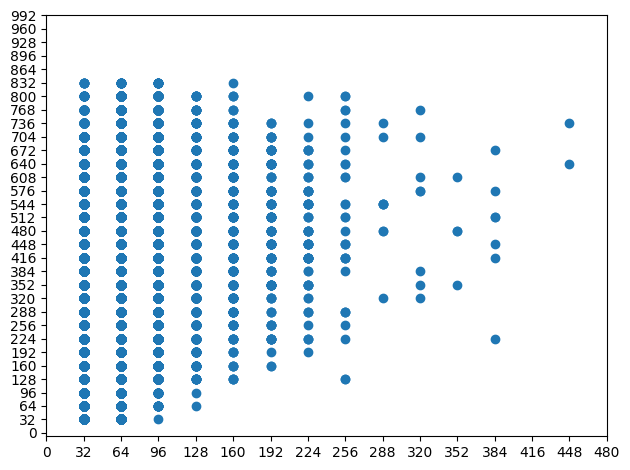

In [12]:
plt.figure()
plt.scatter([s[0] for s in shapes], [s[1] for s in shapes])
plt.yticks(np.arange(0, 1024, 32))
plt.xticks(np.arange(0, 512, 32))
plt.tight_layout()
plt.show()

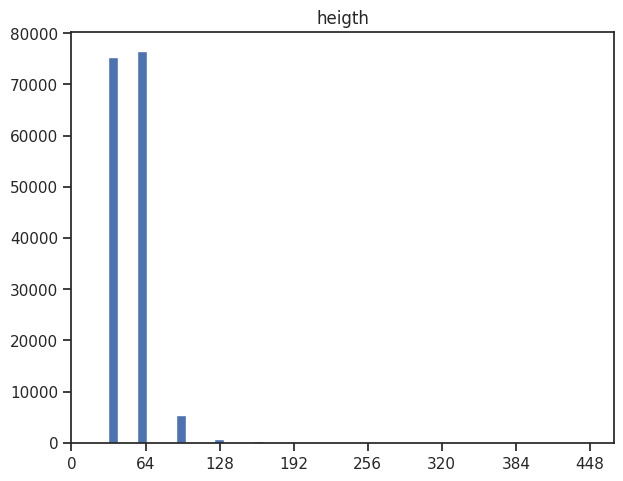

In [55]:
plt.figure()
plt.hist([s[0] for s in shapes], bins=50)
plt.xticks(np.arange(0, 512, 64))
plt.tight_layout()
# plt.yscale("log")
plt.title("heigth")
plt.show()

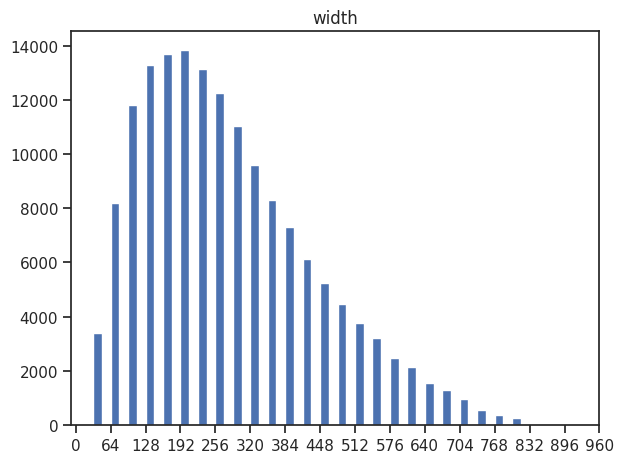

In [56]:
plt.figure()
plt.hist([s[1] for s in shapes], bins=50)
plt.xticks(np.arange(0, 1024, 64))
plt.title("width")
plt.tight_layout()
plt.show()

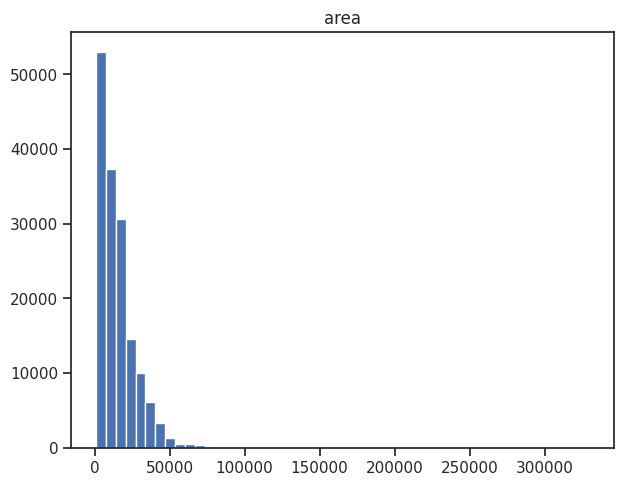

In [57]:
plt.figure()
plt.hist([s[0] * s[1] for s in shapes], bins=50)
plt.tight_layout()
# plt.yscale("log")
plt.title("area")
plt.show()